In [5]:
!pip install openclean

     |████████████████████████████████| 267 kB 5.1 MB/s 
     |████████████████████████████████| 132 kB 54.3 MB/s 
     |████████████████████████████████| 109 kB 51.7 MB/s 
     |████████████████████████████████| 260 kB 50.9 MB/s 
     |████████████████████████████████| 596 kB 45.6 MB/s 
     |████████████████████████████████| 181 kB 59.7 MB/s 
     |████████████████████████████████| 211 kB 55.5 MB/s 
     |████████████████████████████████| 525 kB 52.4 MB/s 
     |████████████████████████████████| 149 kB 44.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 3.6 MB 48.3 MB/s 
     |████████████████████████████████| 61 kB 435 kB/s 
     |████████████████████████████████| 856 kB 50.5 MB/s 
     |████████████████████████████████| 636 kB 66.6 MB/s 
  Created wheel for datasize: filename=datasize-1.0.0-py2.py3-none-any.whl size=155047 sha256=275521c318a6f4cb00a0414c7978797b172c1252557f50f2e11cce3e0134e3c4
  Stored in directory: /root/.cach

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("loans_full_schema.csv")

In [8]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [9]:
df.shape

(10000, 55)

In [10]:
df.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr



---


##Data profiling with Openclean







In [11]:
from openclean.pipeline import stream
datafile = 'loans_full_schema.csv'

In [12]:
ds_full = stream(datafile)

In [13]:
# Count number of records in the datasets.
print(f'{ds_full.count():,} rows.')

10,000 rows.


In [14]:
# Print the first ten rows of the dataset to get a first idea of the content.
ds_full.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3,NJ,MORTGAGE,90000,Verified,18.01,NA,,NA,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0
1,warehouse office clerk,10,HI,RENT,40000,Not Verified,5.04,NA,,NA,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0
2,assembly,3,WI,RENT,40000,Source Verified,21.15,NA,,NA,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.8,175.37,106.43,0
3,customer service,1,PA,RENT,30000,Not Verified,10.16,NA,,NA,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0
4,security supervisor,10,CA,RENT,35000,Verified,57.96,57000,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.8,0
5,,NA,KY,OWN,34000,Not Verified,6.46,NA,,NA,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0
6,hr,10,MI,MORTGAGE,35000,Source Verified,23.66,155000,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560,2730.51,1440,1290.51,0
7,police,10,AZ,MORTGAGE,110000,Source Verified,16.19,NA,,NA,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0
8,parts,10,NV,MORTGAGE,65000,Source Verified,36.48,NA,,NA,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0
9,4th person,3,IL,RENT,30000,Not Verified,18.91,NA,,NA,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0


In [15]:
# Profile the resulting dataset view using the default data profiler.
from openclean.profiling.column import DefaultColumnProfiler
profiles = ds_full.profile(default_profiler=DefaultColumnProfiler)
profiles.stats()

,total,empty,distinct,uniqueness,entropy
emp_title,10000,833,4741,0.517181,10.938668
emp_length,10000,0,12,0.001200,3.159525
state,10000,0,50,0.005000,4.889002
homeownership,10000,0,3,0.000300,1.429252
annual_income,10000,0,1463,0.146300,7.755401
verified_income,10000,0,3,0.000300,1.544713
debt_to_income,10000,0,3674,0.367400,11.549858
annual_income_joint,10000,0,597,0.059700,1.856192
verification_income_joint,10000,8545,3,0.002062,1.547481
debt_to_income_joint,10000,0,1190,0.119000,2.119952


In [16]:
print('Schema\n------')
for col in ds_full.columns:
    p = profiles.column(col)
    print("  '{}' ({})".format(col, p['datatypes']['distinct'].most_common(1)[0][0]))

Schema
------
  'emp_title' (str)
  'emp_length' (int)
  'state' (str)
  'homeownership' (str)
  'annual_income' (int)
  'verified_income' (str)
  'debt_to_income' (float)
  'annual_income_joint' (int)
  'verification_income_joint' (str)
  'debt_to_income_joint' (float)
  'delinq_2y' (int)
  'months_since_last_delinq' (int)
  'earliest_credit_line' (int)
  'inquiries_last_12m' (int)
  'total_credit_lines' (int)
  'open_credit_lines' (int)
  'total_credit_limit' (int)
  'total_credit_utilized' (int)
  'num_collections_last_12m' (int)
  'num_historical_failed_to_pay' (int)
  'months_since_90d_late' (int)
  'current_accounts_delinq' (int)
  'total_collection_amount_ever' (int)
  'current_installment_accounts' (int)
  'accounts_opened_24m' (int)
  'months_since_last_credit_inquiry' (int)
  'num_satisfactory_accounts' (int)
  'num_accounts_120d_past_due' (int)
  'num_accounts_30d_past_due' (int)
  'num_active_debit_accounts' (int)
  'total_debit_limit' (int)
  'num_total_cc_accounts' (int)



---

## Interest_rate Prediction

1.   One-Hot Coding the Categorical Variables
2.   Scaling the data
3.   feature selection(LASSO, PCA)







In [31]:
df = pd.read_csv(datafile)
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [32]:
nsamp, natt = df.shape
print('Number samples = %d' % nsamp)
print('Number attributes per sample = %d' % natt)

Number samples = 10000
Number attributes per sample = 55


In [33]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

Before we proceed, we need to remove the columns with missing values. We see that we remove about 10 attributes.

In [19]:
df = df.dropna(axis=1)

nsamp, natt = df.shape
print('Number samples = %d' % nsamp)
print('Number attributes per sample = %d' % natt)

Number samples = 10000
Number attributes per sample = 45


You will see there are a large number of variables that are categorical meaning they are one of a few discrete values.
We can use the df.dtypes to get the type of each variable. Categorial variables have type object.

In [20]:
print(df.dtypes)

state                            object
homeownership                    object
annual_income                   float64
verified_income                  object
delinq_2y                         int64
earliest_credit_line              int64
inquiries_last_12m                int64
total_credit_lines                int64
open_credit_lines                 int64
total_credit_limit                int64
total_credit_utilized             int64
num_collections_last_12m          int64
num_historical_failed_to_pay      int64
current_accounts_delinq           int64
total_collection_amount_ever      int64
current_installment_accounts      int64
accounts_opened_24m               int64
num_satisfactory_accounts         int64
num_accounts_30d_past_due         int64
num_active_debit_accounts         int64
total_debit_limit                 int64
num_total_cc_accounts             int64
num_open_cc_accounts              int64
num_cc_carrying_balance           int64
num_mort_accounts                 int64


In [21]:
# Find real and categorical variables
cols = df.columns
cat_vars = []
real_vars = []

for col in cols:
    
    if df.dtypes[col]  == 'object':
        cat_vars.append(col)
    else:
        real_vars.append(col)
                
print(f'Categorical variables({len(cat_vars)}) = ' + str(cat_vars))
print('')
print(f'Real variables({len(real_vars)}) = ' + str(real_vars))

Categorical variables(11) = ['state', 'homeownership', 'verified_income', 'loan_purpose', 'application_type', 'grade', 'sub_grade', 'issue_month', 'loan_status', 'initial_listing_status', 'disbursement_method']

Real variables(34) = ['annual_income', 'delinq_2y', 'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines', 'total_credit_limit', 'total_credit_utilized', 'num_collections_last_12m', 'num_historical_failed_to_pay', 'current_accounts_delinq', 'total_collection_amount_ever', 'current_installment_accounts', 'accounts_opened_24m', 'num_satisfactory_accounts', 'num_accounts_30d_past_due', 'num_active_debit_accounts', 'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts', 'num_cc_carrying_balance', 'num_mort_accounts', 'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt', 'loan_amount', 'term', 'interest_rate', 'installment', 'balance', 'paid_total', 'paid_principal', 'paid_interest', 'paid_late_fees']


We next one-hot coded categorical variables. To do this, we use the pd.get_dummies command to convert the categorical variables to one hot coded items. We use the drop_first=True to replace each category with k values to k-1 variables. This removes linearly dependent columns.

In [22]:
# Get the dataframes with real and categorical variables
df_real = df[real_vars]
df_cat = df[cat_vars]

# One-hot encode the categorical variables
df_cat_enc = pd.get_dummies(df_cat, drop_first=True)

To see how the one hot coding worked, we print out the original categorical table, df_cat and the one hot coded variables df_cat_enc

In [23]:
df_cat.head()

,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,NJ,MORTGAGE,Verified,moving,individual,C,C3,Mar-2018,Current,whole,Cash
1,HI,RENT,Not Verified,debt_consolidation,individual,C,C1,Feb-2018,Current,whole,Cash
2,WI,RENT,Source Verified,other,individual,D,D1,Feb-2018,Current,fractional,Cash
3,PA,RENT,Not Verified,debt_consolidation,individual,A,A3,Jan-2018,Current,whole,Cash
4,CA,RENT,Verified,credit_card,joint,C,C3,Mar-2018,Current,whole,Cash


In [24]:
df_cat_enc.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,sub_grade_G4,issue_month_Jan-2018,issue_month_Mar-2018,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),initial_listing_status_whole,disbursement_method_DirectPay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


To get the data matrix, we then concatanate the real and encoded categorical tables and convert to an array. We see there are now 214 attributes.

In [25]:
df_enc = pd.concat((df_real, df_cat_enc), axis=1)
X = np.array(df_enc)
print(X.shape)

xnames = df_enc.columns

(10000, 145)


To get the target we extract the sales price.

In [26]:
y = np.array(df['interest_rate'])

In [62]:
df_enc.corrwith(df['interest_rate']).sort_values(ascending=False)

interest_rate        1.000000
grade_D              0.549689
paid_interest        0.514508
grade_E              0.471906
term                 0.358664
                       ...   
sub_grade_A4        -0.249371
grade_B             -0.251371
total_debit_limit   -0.254225
sub_grade_A3        -0.263111
sub_grade_A2        -0.285208
Length: 145, dtype: float64

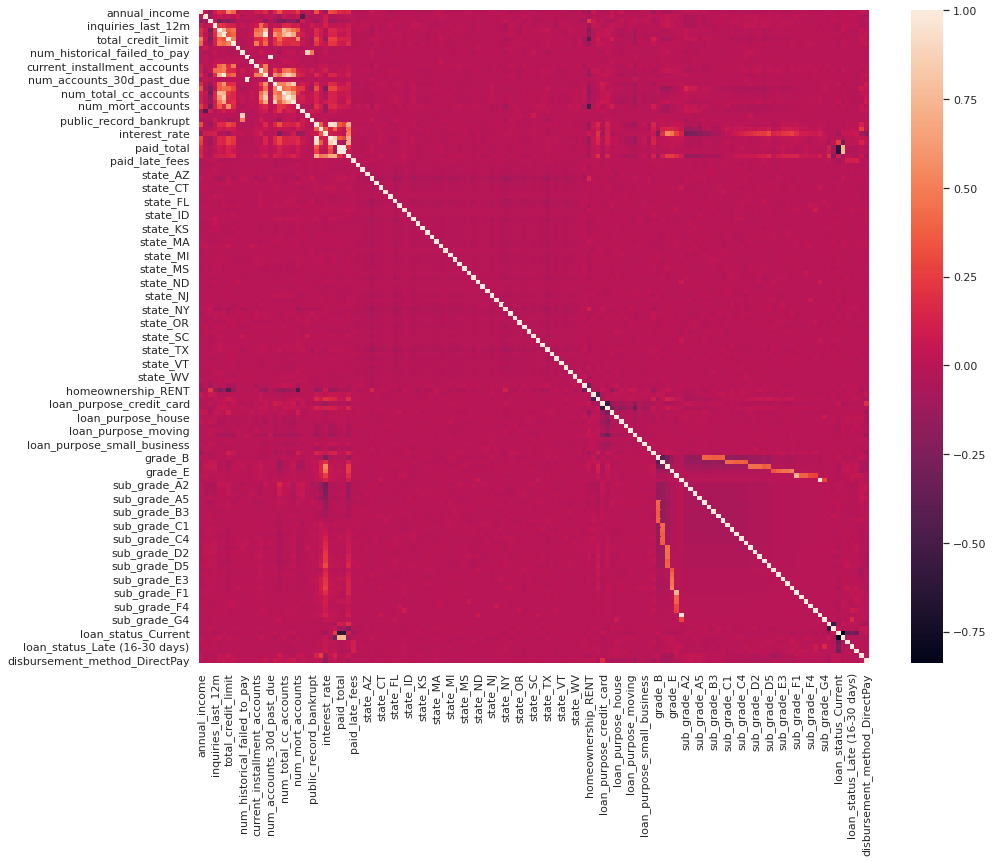

In [69]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(df_enc.corr())

In [27]:
from sklearn.model_selection import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)

A feature of this data is that the attributes have very different ranges of values. Many methods below expect that the variables have similar ranges. For this purpose we use sklearn's StandardScaler which removes the mean from each column and divides by the standard deviation. We fit the parameters for the scaler on the training data and then apply the transform to the training and test data.

Technically, we do not need to scale the output, but it will make the variables easier to interpret.

In [28]:
from sklearn.preprocessing import StandardScaler

# Create the scaler objects
xscal = StandardScaler()
yscal = StandardScaler()

# Fit and transform the training data
Xtr1 = xscal.fit_transform(Xtr)
#ytr1 = yscal.fit_transform(ytr[:,None])

# Transform the test data
Xts1 = xscal.transform(Xts)
#yts1 = yscal.transform(yts[:,None])

In [29]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

# Fit
reg_ls = LinearRegression()
reg_ls.fit(Xtr1, ytr)

# Training R^2
yhat1_tr = reg_ls.predict(Xtr1)
rsq_tr = r2_score(yhat1_tr, ytr)
print('Training R^2 = %f' % rsq_tr)

# Test R^2
yhat_ts = reg_ls.predict(Xts1)
rsq_ts = r2_score(yts, yhat_ts)
print('Test R^2     = %f' % rsq_ts)

Training R^2 = 1.000000
Test R^2     = 1.000000


In [51]:
from sklearn.linear_model import Lasso

# Select alpha
alpha = 3e-3

# Create Lasso object and fit on training data
reg = Lasso(alpha=alpha)
reg.fit(Xtr1, ytr)

# Predict and score on test
yhat = reg.predict(Xts1)
rsq = r2_score(yts, yhat)

print('Test R^2= %f' % rsq)

Test R^2= 1.000000



---
PCA


In [59]:
X

array([[9.000e+04, 0.000e+00, 2.001e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.000e+04, 0.000e+00, 1.996e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.000e+04, 0.000e+00, 2.006e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [6.700e+04, 2.000e+00, 2.004e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.000e+04, 0.000e+00, 1.999e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.600e+04, 0.000e+00, 2.005e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95).fit(Xtr1)
Xtr2 = pca.transform(Xtr1)
Xts2 = pca.transform(Xts1)

In [56]:
reg_ls2 = LinearRegression()
reg_ls2.fit(Xtr2, ytr)

# Training R^2
yhat2_tr = reg_ls2.predict(Xtr2)
rsq_tr2 = r2_score(yhat2_tr, ytr)
print('Training R^2 = %f' % rsq_tr2)

# Test R^2
yhat2_ts = reg_ls2.predict(Xts2)
rsq_ts2 = r2_score(yts, yhat2_ts)
print('Test R^2     = %f' % rsq_ts2)

Training R^2 = 0.962674
Test R^2     = 0.966572
